# Titanic Incident Survivor Analysis
## Emin Keresteci

In [128]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import sklearn
import torch
import torch.nn as nn
import torch.optim as optim
import os
import seaborn as sb

<h2> Data Analysis

In [48]:
data = pd.read_csv("train.csv")
print(data.shape)
print(data.columns)
data.head(10)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [49]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
data_clean = data.drop(columns="Cabin").dropna()
print(data_clean.shape)

(712, 11)


In [67]:
data_numeric = data_clean.drop(columns=["Name","PassengerId"]).apply(lambda x: pd.factorize(x)[0])
data_numeric.head(10)

,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,1,1,1
2,1,0,1,2,1,0,2,2,0
3,1,1,1,3,0,0,3,3,0
4,0,0,0,3,1,0,4,4,0
6,0,1,0,4,1,0,5,5,0
7,0,0,0,5,2,1,6,6,0
8,1,0,1,6,1,2,7,7,0
9,1,2,1,7,0,0,8,8,1
10,1,0,1,8,0,1,9,9,0


<Axes: >

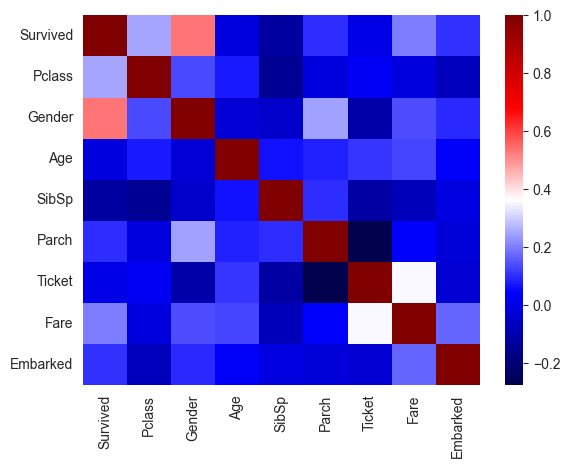

In [68]:
corm = data_numeric.corr()
sb.heatmap(corm,cmap='seismic')

In [74]:
scaler = sklearn.preprocessing.MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)
data_scaled.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,1.0,0.5,1.0,0.011494,0.0,0.0,0.001852,0.004587,0.5
2,1.0,0.0,1.0,0.022989,0.2,0.0,0.003704,0.009174,0.0
3,1.0,0.5,1.0,0.034483,0.0,0.0,0.005556,0.013761,0.0
4,0.0,0.0,0.0,0.034483,0.2,0.0,0.007407,0.018349,0.0


In [75]:
x = data_scaled.drop(columns=['Survived'])
x.head()

,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,0.5,1.0,0.011494,0.0,0.0,0.001852,0.004587,0.5
2,0.0,1.0,0.022989,0.2,0.0,0.003704,0.009174,0.0
3,0.5,1.0,0.034483,0.0,0.0,0.005556,0.013761,0.0
4,0.0,0.0,0.034483,0.2,0.0,0.007407,0.018349,0.0


<Axes: xlabel='count', ylabel='Survived'>

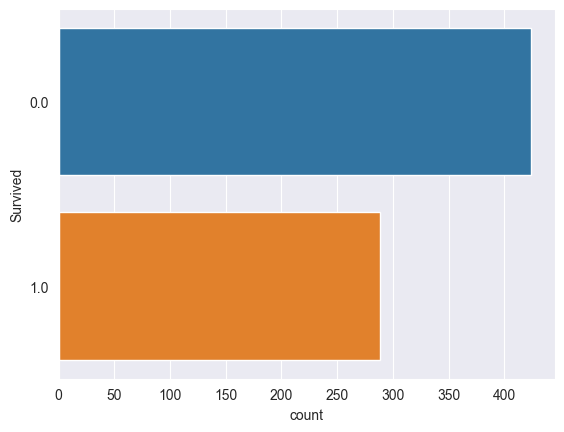

In [76]:
y = data_scaled['Survived']
sb.countplot(y = y)

<h2>Training Miscellaneous Models and Testing

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=33)
from sklearn.model_selection import GridSearchCV
models={}
scores={}

<h2>Clustering

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
kmeans.fit(x_train)
y_pred = kmeans.predict(x_test)
print(f"K-Means Kümeleme Başarısı (ARI): {sklearn.metrics.adjusted_rand_score(y_test, y_pred):.2f}")

K-Means Kümeleme Başarısı (ARI): 0.30


<h3>Nearest Neighbour Classifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier
near = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [i for i in range(1,10)]
    }
gs = GridSearchCV(near, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'n_neighbors': 7}
Best Score: 0.7820369507840397


<h3>Naive Bayes Classifier

In [83]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train, y_train)
print("Naive Bayes:     "+str(naive.score(x_test, y_test)))
models.update(NaiveBayes=naive)
scores.update(NaiveBayes=naive.score(x_test, y_test))

Naive Bayes:     0.7692307692307693


<h3>Quadratic Discriminant Analysis

In [84]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)
print("Quadratic Discriminant Analysis:  "+str(qda.score(x_test, y_test)))

Quadratic Discriminant Analysis:  0.7692307692307693


<h3>Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs',max_iter=1000)
lr.fit(x_train, y_train)
print("LogReg:     "+str(lr.score(x_test, y_test)))
models.update(LogReglbfgs=lr)
scores.update(LogReglbfgs=lr.score(x_test, y_test))

LogReg:     0.7622377622377622


In [86]:
lr = LogisticRegression(solver='newton-cg')
lr.fit(x_train, y_train)
print("LogReg:     "+str(lr.score(x_test, y_test)))
models.update(LogRegnewtoncg=lr)
scores.update(LogRegnewtoncg=lr.score(x_test, y_test))

LogReg:     0.7622377622377622


In [87]:
lr = LogisticRegression(solver='sag',max_iter=10000)
lr.fit(x_train, y_train)
print("LogReg:     "+str(lr.score(x_test, y_test)))
models.update(LogRegsag=lr)
scores.update(LogRegsag=lr.score(x_test, y_test))

LogReg:     0.7622377622377622


In [88]:
lr = LogisticRegression(solver='saga',max_iter=10000)
lr.fit(x_train, y_train)
print("LogReg:     "+str(lr.score(x_test, y_test)))
models.update(LogRegsaga=lr)
scores.update(LogRegsaga=lr.score(x_test, y_test))

LogReg:     0.7622377622377622


In [89]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)
print("LogReg:     "+str(lr.score(x_test, y_test)))
models.update(LogRegliblinear=lr)
scores.update(LogRegliblinear=lr.score(x_test, y_test))

LogReg:     0.7552447552447552


In [91]:
ix = ['Gender','Fare']
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train[ix], y_train)
print("LogReg:     "+str(lr.score(x_test[ix], y_test)))
models.update(LogRegliblinear2features=lr)
scores.update(LogRegliblinear2features=lr.score(x_test[ix], y_test))

LogReg:     0.7762237762237763


<h3>Decision Tree Classifier

In [92]:
from sklearn.tree import *

In [93]:
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': [i for i in range(5,15)],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_leaf_nodes': [i for i in range(10,40)]}
gs = GridSearchCV(dt, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'max_depth': 8, 'max_leaf_nodes': 17, 'min_samples_leaf': 1}
Best Score: 0.7943642291569633


Decision Tree Test Score:     0.7482517482517482


<Figure size 1200x1200 with 0 Axes>

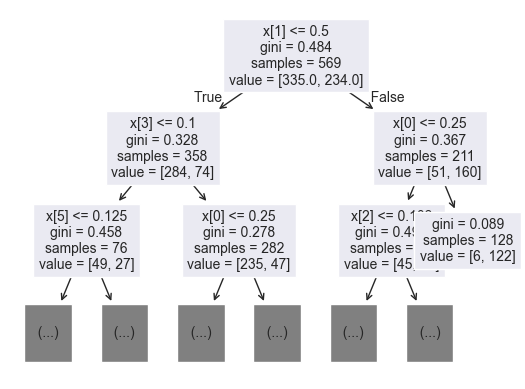

<Figure size 1200x1200 with 0 Axes>

In [94]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, max_leaf_nodes=18)
dt.fit(x_train, y_train)
print("Decision Tree Test Score:     "+str(dt.score(x_test, y_test)))
models.update(DecTree=dt)
scores.update(DecTree=dt.score(x_test, y_test))
plot_tree(dt,fontsize=10,max_depth=2)
plt.figure(figsize=(12,12), dpi=100)

<h3>Ensemble Classifiers

In [95]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

<h4>Random Forest

In [96]:
rf = RandomForestClassifier()
param_grid = {
    #'max_depth': [i for i in range(5,15)],
    #'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    #'max_leaf_nodes': [i for i in range(10,40)],
    'n_estimators': [i*10 for i in range(5,25)]
}
gs = GridSearchCV(rf, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'n_estimators': 200}
Best Score: 0.771417481757491


In [97]:
rf = RandomForestClassifier(n_estimators=130, max_depth=14, min_samples_leaf=4, max_leaf_nodes=34)
rf.fit(x_train, y_train)
print("Random Forest Test Score:  "+str(rf.score(x_test, y_test)))
models.update(RandomForest=rf)
scores.update(RandomForest=rf.score(x_test, y_test))

Random Forest Test Score:  0.7832167832167832


<h4>AdaBoost

In [98]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
print("AdaBoost:  "+str(ada.score(x_test, y_test)))
models.update(AdaBoost=ada)
scores.update(AdaBoost=ada.score(x_test, y_test))

AdaBoost:  0.7902097902097902


<h4>Gradient Boost

In [99]:
gb = GradientBoostingClassifier( min_samples_leaf=4, max_depth=5, max_leaf_nodes=17, learning_rate=0.15 )# n_estimators=60, 
param_grid = {
    #'max_depth': [i for i in range(5,15)],
    #'learning_rate': [i*0.1 for i in range(5,25)],
    #'max_leaf_nodes': [i for i in range(10,40)],
    #'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'n_estimators': [i*5 for i in range(10,40)]
}
gs = GridSearchCV(gb, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'n_estimators': 75}
Best Score: 0.755674584691818


In [100]:
gb = GradientBoostingClassifier(n_estimators=55, max_depth=5, min_samples_leaf=6, max_leaf_nodes=17, learning_rate=0.15)
gb.fit(x_train, y_train)
print("GradientBoost:  "+str(gb.score(x_test, y_test)))
models.update(GradientBoost=gb)
scores.update(GradientBoost=gb.score(x_test, y_test))

GradientBoost:  0.7552447552447552


<h4>Extreme Gradient Boost

In [102]:
from xgboost import XGBClassifier

In [103]:
xgb = XGBClassifier( n_estimators=60, max_depth=5, max_leaves=17, learning_rate=0.09 )#  
param_grid = {
    #'max_depth': [i for i in range(5,15)],
    #'learning_rate': [i*0.1 for i in range(1,10)],
    #'max_leaves': [i for i in range(10,40)],
    'n_estimators': [i*5 for i in range(10,40)]
}
gs = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'n_estimators': 50}
Best Score: 0.7749883558453657


In [104]:
xgb = XGBClassifier(n_estimators=80, max_depth=5,  max_leaves=17, learning_rate=0.09)
xgb.fit(x_train, y_train)
print("ExtremeGradientBoost:  "+str(xgb.score(x_test, y_test)))
models.update(XGBoost=xgb)
scores.update(XGBoost=xgb.score(x_test, y_test))

ExtremeGradientBoost:  0.7622377622377622


<h3>Support Vector Machine Classifier

In [105]:
from sklearn.svm import SVC

In [106]:
svm = SVC()# kernel rbf by default
param_grid = {
    'C': [i/10 for i in range(1,30)],
    'gamma': [*[10**(-i) for i in range(5)], *[2,3,4]]}
gs = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'C': 1.0, 'gamma': 1}
Best Score: 0.7995342338146251


In [107]:
svm = SVC(gamma = 0.001, C = 2.8) # kernel rbf by default
svm.fit(x_train, y_train)
print("SVM Rbf Test Score")
print(svm.score(x_test, y_test))
models.update(SVMRbf=svm)
scores.update(SVMRbf=svm.score(x_test, y_test))

SVM Rbf Test Score
0.6223776223776224


In [109]:
#Utilizing the most correlated features to the target
ix = ['Gender','Fare']
svm = SVC()# kernel rbf by default
param_grid = {
    'C': [i/10 for i in range(1,30)],
    'gamma': [*[10**(-i) for i in range(5)], *[2,3,4]]}
gs = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train[ix], y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'C': 0.1, 'gamma': 1}
Best Score: 0.7802359882005899


In [110]:
svm = SVC(gamma = 1, C = 2.3) # kernel rbf by default
ix = ['Gender','Fare']
svm.fit(x_train[ix], y_train)
print("SVM RBF Test Score with the features Gender and Fare only")
print(svm.score(x_test[ix], y_test))
models.update(SVMRbf2features=svm)
scores.update(SVMRbf2features=svm.score(x_test[ix], y_test))

SVM RBF Test Score with the features Gender and Fare only
0.7762237762237763


In [111]:
svm = SVC(kernel="linear")
param_grid = {
    'C': [i/100 for i in range(1,20)]}
gs = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'C': 0.02}
Best Score: 0.7802359882005899


In [112]:
svm = SVC(kernel="linear",  C = 0.02) 
svm.fit(x_train, y_train)
print("SVM Test Score with kernel Linear")
print(svm.score(x_test, y_test))
models.update(SVMlinear=svm)
scores.update(SVMlinear=svm.score(x_test, y_test))

SVM Test Score with kernel Linear
0.7762237762237763


In [113]:
svm = SVC(kernel="sigmoid")
param_grid = {
    'C': [i/10 for i in range(1,300)],
    'gamma': [*[10**(-i) for i in range(10)], *[2,3,4] ]
}
gs = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'C': 11.3, 'gamma': 0.001}
Best Score: 0.7942710759198881


In [114]:
svm = SVC(kernel="sigmoid",gamma = 0.0001, C = 22.5) # kernel rbf by default
svm.fit(x_train, y_train)
print("SVM Test Score with kernel Sigmoid")
print(svm.score(x_test, y_test))
models.update(SVMsigmoid=svm)
scores.update(SVMsigmoid=svm.score(x_test, y_test))

SVM Test Score with kernel Sigmoid
0.6223776223776224


<h3>Neural Network Classifier

<h4>Sklearn Mlp Model

In [115]:
from sklearn.neural_network import MLPClassifier

In [116]:
mlp = MLPClassifier(random_state=4,max_iter=2000)

param_grid = {
    'hidden_layer_sizes': [i for i in range(1,15)],
    #'learning_rate_init': [.001,.01,.1,.0001,1],
    #'momentum': [i/10 for i in range(1,5)]
}
gs = GridSearchCV(mlp, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'hidden_layer_sizes': 14}
Best Score: 0.7959944108057755


In [117]:
mlp = MLPClassifier(hidden_layer_sizes=(11,),learning_rate_init=0.01, momentum=0.1, random_state=4, max_iter=2000)
mlp.fit(x_train, y_train)
print("MLP Test Score")
print(mlp.score(x_test, y_test))
models.update(MLP=mlp)
scores.update(MLP=mlp.score(x_test, y_test))

MLP Test Score
0.7692307692307693


<h4>ANN using PyTorch 

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=33)
x_val, x_test, y_val, y_test = train_test_split(x_test,y_test,test_size=0.5, random_state=33)
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)
num_features = x_train.shape[1]

(569, 8) (71, 8) (72, 8) (569,) (71,) (72,)


In [161]:
def to_tensor(x):
    return torch.tensor(x.values if hasattr(x, 'values') else x, dtype=torch.float32)

def train(model, x_train, y_train, x_val, y_val, epochs=40, lr=0.01):
    xt, yt = to_tensor(x_train), to_tensor(y_train).view(-1, 1)
    xv, yv = to_tensor(x_val), to_tensor(y_val).view(-1, 1)
    
    opt = optim.Adam(model.parameters(), lr=lr)
    crit = nn.BCELoss()
    hist = {'train_loss': [], 'val_loss': [], 'train_accuracy': [], 'val_accuracy': []}

    for _ in range(epochs):
        model.train()
        opt.zero_grad()
        out = model(xt)
        loss = crit(out, yt)
        loss.backward()
        opt.step()
        
        model.eval()
        with torch.no_grad():
            val_out = model(xv)
            hist['train_loss'].append(loss.item())
            hist['val_loss'].append(crit(val_out, yv).item())
            hist['train_accuracy'].append(((out > 0.5) == yt).float().mean().item())
            hist['val_accuracy'].append(((val_out > 0.5) == yv).float().mean().item())
    return hist

def test(model, x, y):
    model.eval()
    with torch.no_grad():
        pred = model(to_tensor(x))
        yt = to_tensor(y).view(-1, 1)
        return ((pred > 0.5) == yt).float().mean().item()

Sequential(
  (0): Linear(in_features=8, out_features=4, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=4, out_features=2, bias=True)
  (3): ELU(alpha=1.0)
  (4): Linear(in_features=2, out_features=1, bias=True)
  (5): Sigmoid()
)


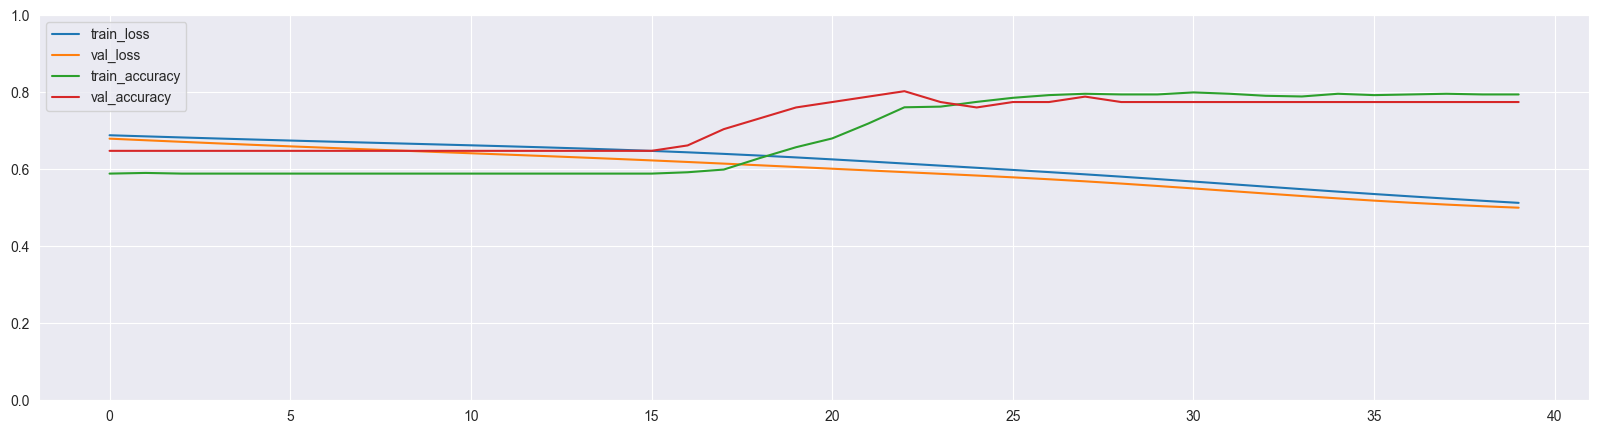

Test Score:   0.6944444179534912


In [162]:
torch.manual_seed(33)
model = nn.Sequential(
    nn.Linear(num_features, 4), nn.ELU(),
    nn.Linear(4, 2), nn.ELU(),
    nn.Linear(2, 1), nn.Sigmoid()
)
print(model)

history = train(model, x_train, y_train, x_val, y_val)

pd.DataFrame(history).plot(figsize=(20, 5), grid=True, ylim=(0, 1))
plt.show()

score = test(model, x_test, y_test)
print("Test Score:  ", score)

models.update(ANN_2_4=model)
scores.update(ANN_2_4=score)

Sequential(
  (0): Linear(in_features=8, out_features=7, bias=True)
  (1): ELU(alpha=1.0)
  (2): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.1, inplace=False)
  (4): Linear(in_features=7, out_features=7, bias=True)
  (5): ELU(alpha=1.0)
  (6): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.1, inplace=False)
  (8): Linear(in_features=7, out_features=7, bias=True)
  (9): ELU(alpha=1.0)
  (10): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Dropout(p=0.1, inplace=False)
  (12): Linear(in_features=7, out_features=7, bias=True)
  (13): ELU(alpha=1.0)
  (14): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): Dropout(p=0.1, inplace=False)
  (16): Linear(in_features=7, out_features=4, bias=True)
  (17): ELU(alpha=1.0)
  (18): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (19): Dro

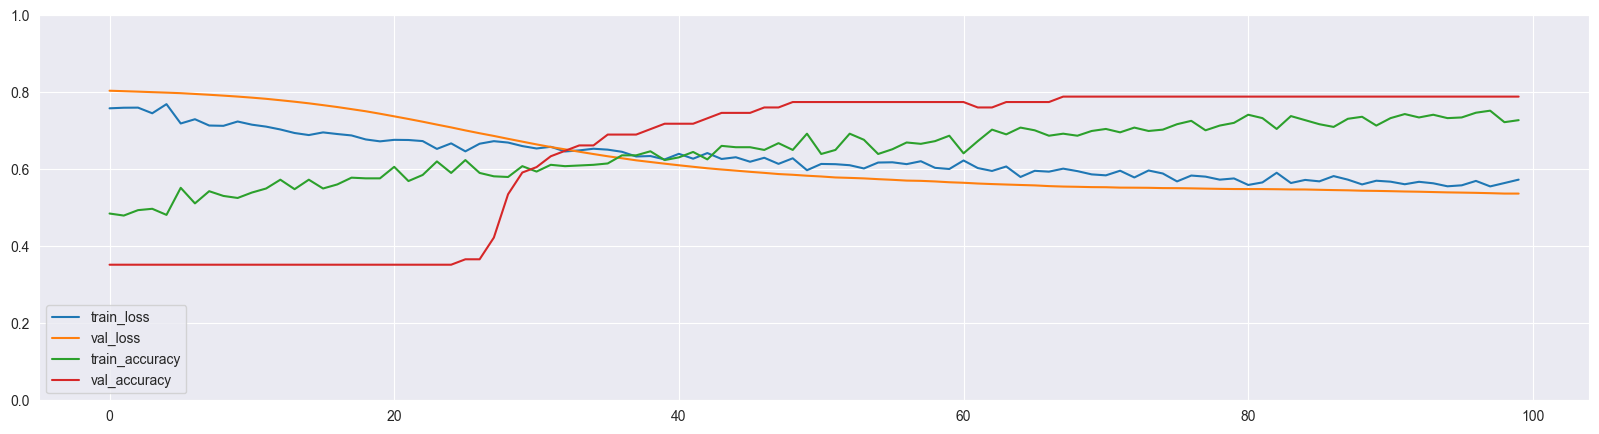

Test Score:   0.7638888955116272


In [176]:
torch.manual_seed(33)
model = nn.Sequential(
    nn.Linear(num_features, 7), nn.ELU(), nn.BatchNorm1d(7), nn.Dropout(0.1),
    nn.Linear(7, 7), nn.ELU(), nn.BatchNorm1d(7), nn.Dropout(0.1),
    nn.Linear(7, 7), nn.ELU(), nn.BatchNorm1d(7), nn.Dropout(0.1),
    nn.Linear(7, 7), nn.ELU(), nn.BatchNorm1d(7), nn.Dropout(0.1),
    nn.Linear(7, 4), nn.ELU(), nn.BatchNorm1d(4), nn.Dropout(0.1),
    nn.Linear(4, 1), nn.Sigmoid()
)
print(model)

history = train(model, x_train, y_train, x_val, y_val, epochs=100, lr=0.001)

pd.DataFrame(history).plot(figsize=(20, 5), grid=True, ylim=(0, 1))
plt.show()

score = test(model, x_test, y_test)
print("Test Score:  ", score)

models.update(ANN_5_7=model)
scores.update(ANN_5_7=score)

Sequential(
  (0): Linear(in_features=8, out_features=7, bias=True)
  (1): ELU(alpha=1.0)
  (2): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.3, inplace=False)
  (4): Linear(in_features=7, out_features=7, bias=True)
  (5): ELU(alpha=1.0)
  (6): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.3, inplace=False)
  (8): Linear(in_features=7, out_features=7, bias=True)
  (9): ELU(alpha=1.0)
  (10): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Dropout(p=0.3, inplace=False)
  (12): Linear(in_features=7, out_features=7, bias=True)
  (13): ELU(alpha=1.0)
  (14): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): Linear(in_features=7, out_features=7, bias=True)
  (16): ELU(alpha=1.0)
  (17): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (18): Linear(in_features=7, out_features=7, bia

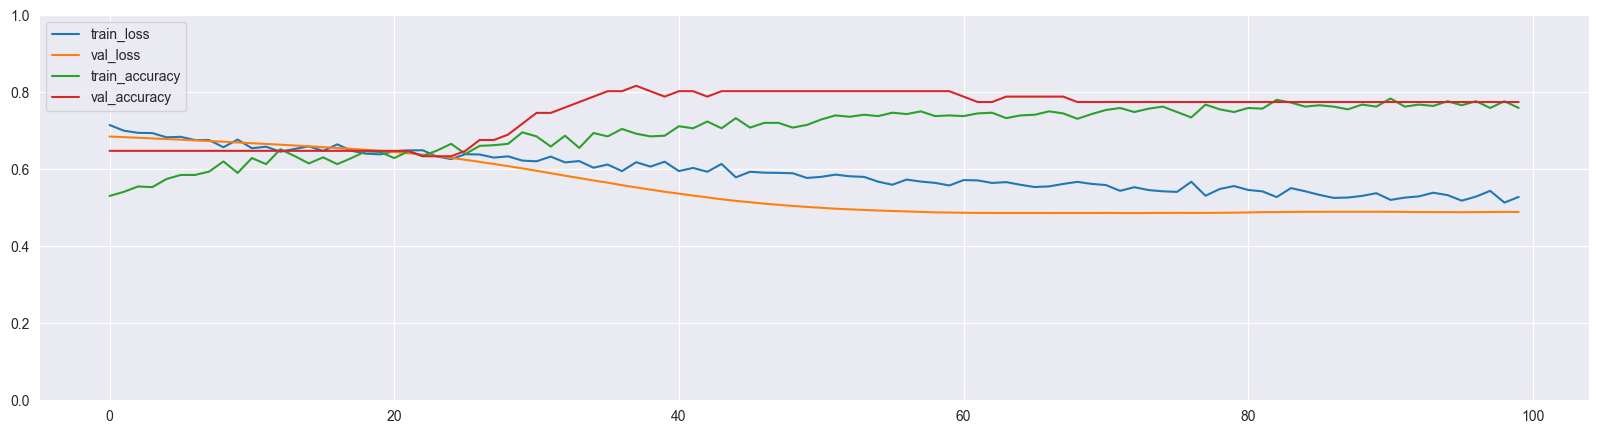

Test Score:   0.75


In [177]:
torch.manual_seed(33)
model = nn.Sequential(
    nn.Linear(num_features, 7), nn.ELU(), nn.BatchNorm1d(7), nn.Dropout(0.3),
    nn.Linear(7, 7), nn.ELU(), nn.BatchNorm1d(7), nn.Dropout(0.3),
    nn.Linear(7, 7), nn.ELU(), nn.BatchNorm1d(7), nn.Dropout(0.3),
    nn.Linear(7, 7), nn.ELU(), nn.BatchNorm1d(7),
    nn.Linear(7, 7), nn.ELU(), nn.BatchNorm1d(7),
    nn.Linear(7, 7), nn.ELU(), nn.BatchNorm1d(7),
    nn.Linear(7, 7), nn.ELU(), nn.BatchNorm1d(7),
    nn.Linear(7, 7), nn.ELU(), nn.BatchNorm1d(7),
    nn.Linear(7, 7), nn.ELU(), nn.BatchNorm1d(7),
    nn.Linear(7, 4), nn.ELU(), nn.BatchNorm1d(4),
    nn.Linear(4, 1), nn.Sigmoid()
)
print(model)

history = train(model, x_train, y_train, x_val, y_val, epochs=100, lr=0.001)

pd.DataFrame(history).plot(figsize=(20, 5), grid=True, ylim=(0, 1))
plt.show()

score = test(model, x_test, y_test)
print("Test Score:  ", score)

models.update(ANN_11_7=model)
scores.update(ANN_11_7=score)

Sequential(
  (0): Linear(in_features=8, out_features=100, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ELU(alpha=1.0)
  (4): Linear(in_features=50, out_features=1, bias=True)
  (5): Sigmoid()
)


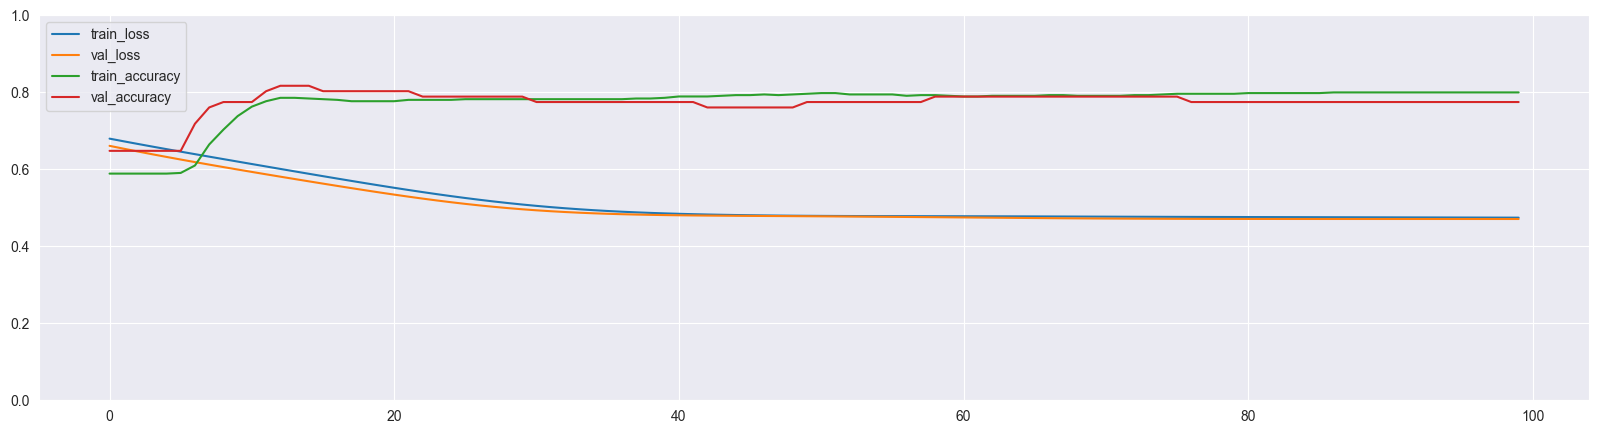

Test Score:   0.75


In [178]:
torch.manual_seed(33)
model = nn.Sequential(
    nn.Linear(num_features, 100), nn.ELU(),
    nn.Linear(100, 50), nn.ELU(),
    nn.Linear(50, 1), nn.Sigmoid()
)
print(model)

history = train(model, x_train, y_train, x_val, y_val, epochs=100, lr=0.001)

pd.DataFrame(history).plot(figsize=(20, 5), grid=True, ylim=(0, 1))
plt.show()

score = test(model, x_test, y_test)
print("Test Score:  ", score)

models.update(ANN_2_100=model)
scores.update(ANN_2_100=score)

Sequential(
  (0): Linear(in_features=8, out_features=1000, bias=True)
  (1): ELU(alpha=1.0)
  (2): Dropout(p=0.2, inplace=False)
  (3): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Linear(in_features=1000, out_features=900, bias=True)
  (5): ELU(alpha=1.0)
  (6): Dropout(p=0.2, inplace=False)
  (7): BatchNorm1d(900, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Linear(in_features=900, out_features=800, bias=True)
  (9): ELU(alpha=1.0)
  (10): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Linear(in_features=800, out_features=400, bias=True)
  (12): ELU(alpha=1.0)
  (13): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): Linear(in_features=400, out_features=200, bias=True)
  (15): ELU(alpha=1.0)
  (16): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (17): Linear(in_features=200, out_features=100, bias=T

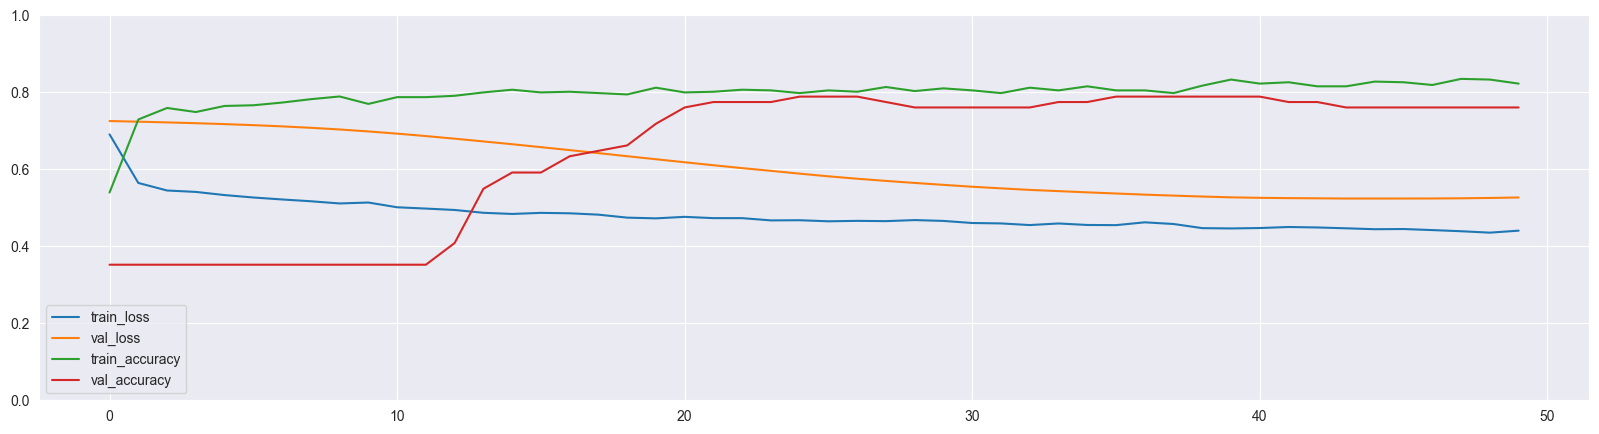

Test Score:   0.7361111044883728


In [166]:
torch.manual_seed(33)
model = nn.Sequential(
    nn.Linear(num_features, 1000), nn.ELU(), nn.Dropout(0.2), nn.BatchNorm1d(1000),
    nn.Linear(1000, 900), nn.ELU(), nn.Dropout(0.2), nn.BatchNorm1d(900),
    nn.Linear(900, 800), nn.ELU(), nn.BatchNorm1d(800),
    nn.Linear(800, 400), nn.ELU(), nn.BatchNorm1d(400),
    nn.Linear(400, 200), nn.ELU(), nn.BatchNorm1d(200),
    nn.Linear(200, 100), nn.ELU(), nn.BatchNorm1d(100),
    nn.Linear(100, 80), nn.ELU(), nn.BatchNorm1d(80),
    nn.Linear(80, 40), nn.ELU(), nn.BatchNorm1d(40),
    nn.Linear(40, 30), nn.ELU(), nn.BatchNorm1d(30),
    nn.Linear(30, 20), nn.ELU(), nn.BatchNorm1d(20),
    nn.Linear(20, 10), nn.ELU(), nn.BatchNorm1d(10),
    nn.Linear(10, 1), nn.Sigmoid()
)
print(model)

history = train(model, x_train, y_train, x_val, y_val, epochs=50, lr=0.0001)

pd.DataFrame(history).plot(figsize=(20, 5), grid=True, ylim=(0, 1))
plt.show()

score = test(model, x_test, y_test)
print("Test Score:  ", score)

models.update(ANN_11_1000_BN_Dropout=model)
scores.update(ANN_11_1000_BN_Dropout=score)

In [167]:
best_score = 0
for key, value in scores.items():
    print(key,":",round(value,3))
    if value > best_score:
        best_score = value
        best_key = key
best_model = models[best_key]

NearN : 0.776
NaiveBayes : 0.769
LogReglbfgs : 0.762
LogRegnewtoncg : 0.762
LogRegsag : 0.762
LogRegsaga : 0.762
LogRegliblinear : 0.755
LogRegliblinear2features : 0.776
DecTree : 0.748
RandomForest : 0.783
AdaBoost : 0.79
GradientBoost : 0.755
XGBoost : 0.762
SVMRbf : 0.622
SVMRbf2features : 0.776
SVMlinear : 0.776
SVMsigmoid : 0.622
MLP : 0.769
ANN_2_4 : 0.694
ANN_11_7 : 0.75
ANN_2_100 : 0.75
ANN_11_1000_BN : 0.611
ANN_11_1000_BN_Dropout : 0.736


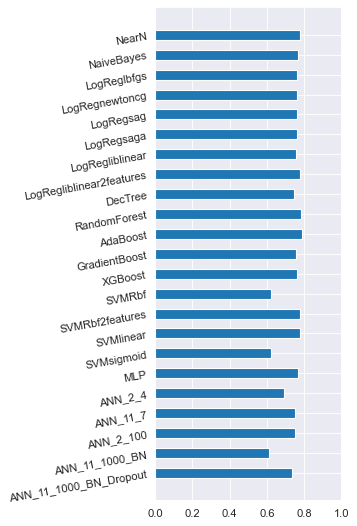

<Figure size 640x480 with 0 Axes>

In [168]:
names = list(scores.keys())
values = list(scores.values())
names.reverse()
values.reverse()
figure(figsize=(3, 8), dpi=80)
plt.grid(True)
plt.gca().set_xlim(0, 1)
plt.barh(range(len(scores)), values, 0.5, tick_label=names)
plt.yticks(rotation=10)
plt.show()
plt.savefig("models_barhplot")

<h4>Confusion Matrix and Classification Report

AdaBoostClassifier()


<Axes: >

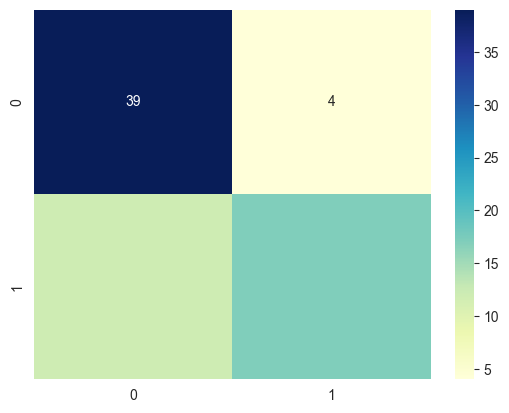

In [169]:
print(best_model)
ytrue = pd.DataFrame(y_test)
ypred = pd.DataFrame(best_model.predict(x_test)>0.5)
confm = sklearn.metrics.confusion_matrix(ytrue,ypred)
sb.heatmap(confm,annot=True,cmap='YlGnBu')

In [170]:
print('\n\nClassification Report : \n\n')
print(sklearn.metrics.classification_report(ytrue,ypred))



Classification Report : 


              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83        43
         1.0       0.81      0.59      0.68        29

    accuracy                           0.78        72
   macro avg       0.79      0.75      0.75        72
weighted avg       0.78      0.78      0.77        72



<h4>ROC and AUC

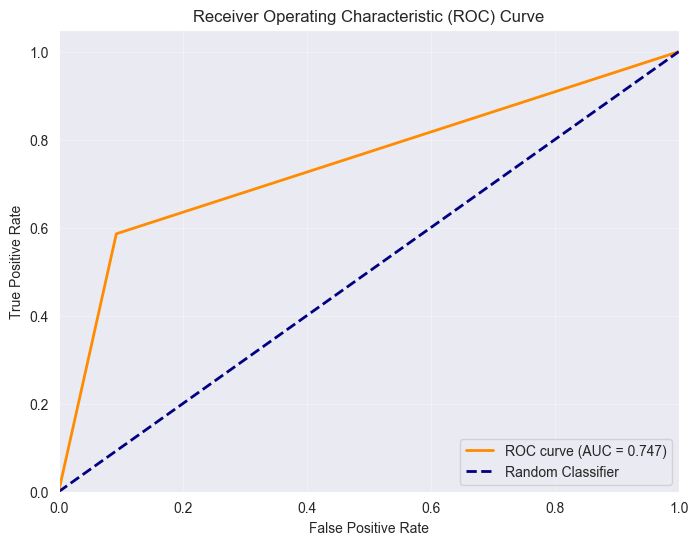

In [171]:
from sklearn.metrics import roc_curve, auc

y_pred = best_model.predict(x_test)
if isinstance(y_pred, pd.DataFrame):
    y_pred = y_pred.values.flatten()
elif len(y_pred.shape) > 1:
    y_pred = y_pred.flatten()

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()